In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('trip.csv')

In [4]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [6]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [7]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [8]:
data[data['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [9]:
data[data['passenger_name'] == 'Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [10]:
data = data.drop_duplicates(subset=['passenger_name'])

In [11]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22695,Patrick Williams,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,Cash,1,0.89,7.5,1.76,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [12]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [13]:
data = data.dropna()

In [14]:
data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

In [15]:
data['passenger_count'].sort_values()

18311     0
13421     0
5670      0
12205     0
21218     0
         ..
20837     6
2972      6
11336     6
0         6
64       36
Name: passenger_count, Length: 20027, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

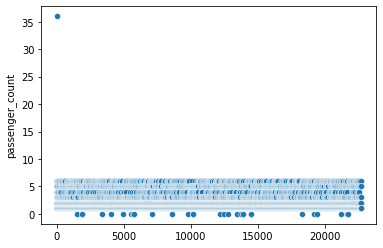

In [16]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [17]:
data = data[data['passenger_count'] <= 6]

In [18]:
len(data[data['passenger_count'] == 0])

30

In [19]:
data = data[data['passenger_count'] != 0]

<AxesSubplot:ylabel='passenger_count'>

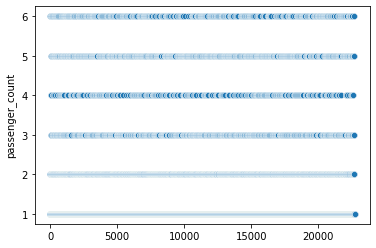

In [20]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [21]:
data['trip_distance'].describe()

count    19996.000000
mean         2.914175
std          3.675173
min          0.000000
25%          0.990000
50%          1.600000
75%          3.042500
max         33.960000
Name: trip_distance, dtype: float64

In [22]:
data = data[data['trip_distance'] < 30]

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

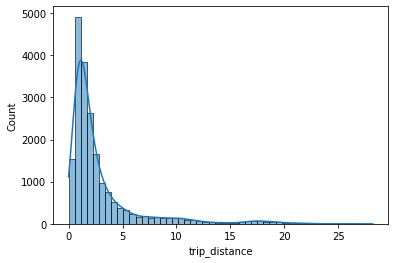

In [23]:
sns.histplot(data['trip_distance'], bins=50, kde=True)

In [24]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,19989.000000,19989.000000,19989.000000,19989.000000,19989.000000
mean,1.643554,2.903979,12.964783,1.827792,0.310944
std,1.282284,3.635095,13.008739,2.802596,1.398203
min,1.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.600000,9.500000,1.350000,0.000000
75%,2.000000,3.040000,14.500000,2.360000,0.000000
max,6.000000,28.200000,999.990000,200.000000,19.100000


In [25]:
(data['fare_amount'] <= 0).sum()

19

In [26]:
data = data[data['fare_amount'] > 0]

In [27]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
14285,Mark Reed,05/03/2017 7:44:28 PM,05/03/2017 7:44:38 PM,Debit Card,1,0.00,0.01,0.00,0.00
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
13972,Matthew Blake,02/23/2017 9:21:25 AM,02/23/2017 9:21:57 AM,Cash,1,0.00,1.00,0.00,0.00
12146,Daniel Fletcher,12/28/2017 8:13:08 AM,12/28/2017 8:13:35 AM,Cash,1,0.00,2.50,0.00,0.00
16351,Nathan Salazar,05/13/2017 5:42:22 PM,05/13/2017 5:42:45 PM,Cash,1,0.02,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,175.00,46.69,11.75
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.00,200.00,11.00,0.00


In [28]:
data = data[data['fare_amount'] > 0]

<AxesSubplot:ylabel='fare_amount'>

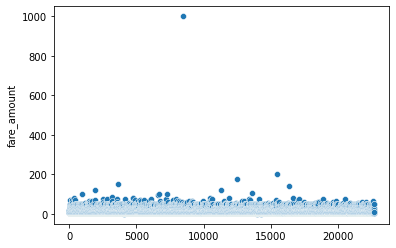

In [29]:
sns.scatterplot(x=data.index, y=data['fare_amount'])

In [30]:
def fare_func(x):
    if x > 150:
        return 150
    else:
        return x

In [31]:
data['fare_amount'].apply(fare_func)

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22695     7.5
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 19970, dtype: float64

In [32]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [33]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
14285,Mark Reed,05/03/2017 7:44:28 PM,05/03/2017 7:44:38 PM,Debit Card,1,0.00,0.01,0.00,0.00
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
13972,Matthew Blake,02/23/2017 9:21:25 AM,02/23/2017 9:21:57 AM,Cash,1,0.00,1.00,0.00,0.00
12146,Daniel Fletcher,12/28/2017 8:13:08 AM,12/28/2017 8:13:35 AM,Cash,1,0.00,2.50,0.00,0.00
16351,Nathan Salazar,05/13/2017 5:42:22 PM,05/13/2017 5:42:45 PM,Cash,1,0.02,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.60,150.00,200.00,0.00
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.00,150.00,11.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,150.00,0.00,0.00


<AxesSubplot:ylabel='tip_amount'>

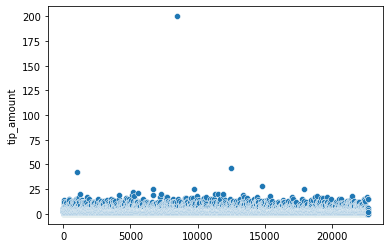

In [34]:
sns.scatterplot(x=data.index, y=data['tip_amount'])

In [35]:
data['tip_amount'].describe()

count    19970.000000
mean         1.829531
std          2.803362
min          0.000000
25%          0.000000
50%          1.350000
75%          2.370000
max        200.000000
Name: tip_amount, dtype: float64

In [36]:
data = data[data['tip_amount'] <= 50]

In [37]:
len(data)

19969

<AxesSubplot:ylabel='tolls_amount'>

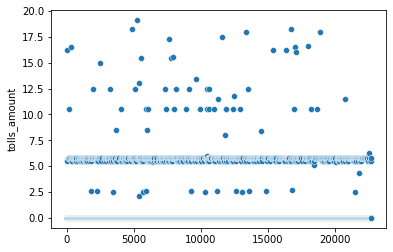

In [38]:
sns.scatterplot(x=data.index, y=data['tolls_amount'])

In [39]:
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.00,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.00,2.06,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00


In [40]:
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [41]:
data['payment_method'].value_counts()

Cash           9832
Debit Card     5125
Credit Card    5012
Name: payment_method, dtype: int64

In [42]:
data['payment_method'] = data['payment_method'].replace(['Debit Card', 'Credit Card'], 'Card')

In [43]:
data['payment_method'].value_counts()

Card    10137
Cash     9832
Name: payment_method, dtype: int64

In [44]:
example = 'Susan Robinson'

In [45]:
example.split()

['Susan', 'Robinson']

In [46]:
data['passenger_first_name'] = data['passenger_name'].apply(lambda x: x.split()[0])

In [47]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19969 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         19969 non-null  object 
 1   tpep_pickup_datetime   19969 non-null  object 
 2   tpep_dropoff_datetime  19969 non-null  object 
 3   payment_method         19969 non-null  object 
 4   passenger_count        19969 non-null  int64  
 5   trip_distance          19969 non-null  float64
 6   fare_amount            19969 non-null  float64
 7   tip_amount             19969 non-null  float64
 8   tolls_amount           19969 non-null  float64
 9   passenger_first_name   19969 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.7+ MB


In [49]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [50]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19969 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         19969 non-null  object        
 1   tpep_pickup_datetime   19969 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  19969 non-null  datetime64[ns]
 3   payment_method         19969 non-null  object        
 4   passenger_count        19969 non-null  int64         
 5   trip_distance          19969 non-null  float64       
 6   fare_amount            19969 non-null  float64       
 7   tip_amount             19969 non-null  float64       
 8   tolls_amount           19969 non-null  float64       
 9   passenger_first_name   19969 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 1.7+ MB


In [52]:
data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [53]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19969 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         19969 non-null  object         
 1   tpep_pickup_datetime   19969 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  19969 non-null  datetime64[ns] 
 3   payment_method         19969 non-null  object         
 4   passenger_count        19969 non-null  int64          
 5   trip_distance          19969 non-null  float64        
 6   fare_amount            19969 non-null  float64        
 7   tip_amount             19969 non-null  float64        
 8   tolls_amount           19969 non-null  float64        
 9   passenger_first_name   19969 non-null  object         
 10  travel_time            19969 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 1.8+ MB


In [55]:
data['travel_time_seconds'] = data['travel_time'].dt.total_seconds()

In [56]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,travel_time_seconds
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,0 days 00:14:04,844.0
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30,1590.0
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12,432.0
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15,1815.0
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43,1003.0


In [57]:
data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

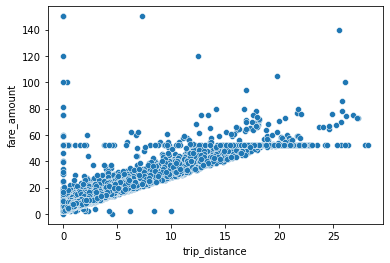

In [58]:
sns.scatterplot(x=data['trip_distance'], y=data['fare_amount'])

<AxesSubplot:xlabel='travel_time_seconds', ylabel='fare_amount'>

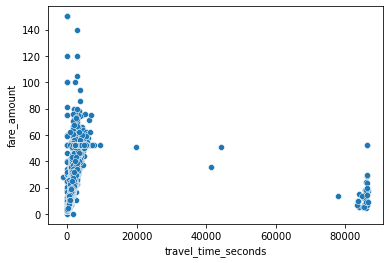

In [59]:
sns.scatterplot(x=data['travel_time_seconds'], y=data['fare_amount'])

<AxesSubplot:xlabel='trip_distance', ylabel='travel_time_seconds'>

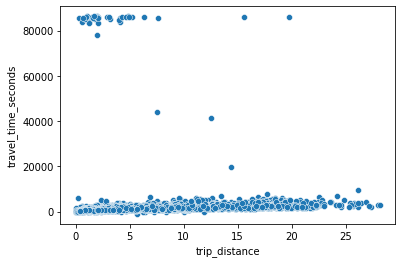

In [60]:
sns.scatterplot(x=data['trip_distance'], y=data['travel_time_seconds'])

In [61]:
data = data[(data['travel_time_seconds'] > 0) & (data['travel_time_seconds'] <= 7200)]

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19904 entries, 0 to 22700
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         19904 non-null  object         
 1   tpep_pickup_datetime   19904 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  19904 non-null  datetime64[ns] 
 3   payment_method         19904 non-null  object         
 4   passenger_count        19904 non-null  int64          
 5   trip_distance          19904 non-null  float64        
 6   fare_amount            19904 non-null  float64        
 7   tip_amount             19904 non-null  float64        
 8   tolls_amount           19904 non-null  float64        
 9   passenger_first_name   19904 non-null  object         
 10  travel_time            19904 non-null  timedelta64[ns]
 11  travel_time_seconds    19904 non-null  float64        
 12  total_amount           19904 non-null  float64